# The lines before the header were manually removed

New Code with pickle

In [1]:
import pandas as pd
import pickle

# Load the data
try:
    with open("data/county_cavan.pkl", "rb") as f:
        county_cavan = pickle.load(f)
except FileNotFoundError:
    county_cavan = pd.read_csv("data/dly675_cavan-ballyhaise.csv")
    county_cavan["date"] = pd.to_datetime(county_cavan["date"])
    county_cavan = county_cavan[(county_cavan["date"].dt.year >= 2018) & (county_cavan["date"].dt.year <= 2022)]


In [2]:
county_cavan = county_cavan.loc[:, ~county_cavan.columns.str.startswith(('ind', 'file'))]

In [4]:
# Assuming df is the name of your dataframe
county_cavan= county_cavan.replace(r'\s+', 777444, regex=True)


In [5]:
for column in county_cavan.columns:
    # get the indices of the rows that contain 777444
    indices = county_cavan[county_cavan[column] == 777444].index.tolist()
    
    # get the date column values for those indices
    dates = county_cavan.loc[indices, 'date'].tolist()
    
    # print the results
    print(f'The value of 777444 occurred {len(indices)} times in {column} on the following dates: {dates}.')

The value of 777444 occurred 0 times in date on the following dates: [].
The value of 777444 occurred 0 times in maxtp on the following dates: [].
The value of 777444 occurred 0 times in mintp on the following dates: [].
The value of 777444 occurred 0 times in igmin on the following dates: [].
The value of 777444 occurred 0 times in gmin on the following dates: [].
The value of 777444 occurred 0 times in rain on the following dates: [].
The value of 777444 occurred 1 times in cbl on the following dates: [Timestamp('2018-09-25 00:00:00')].
The value of 777444 occurred 0 times in wdsp on the following dates: [].
The value of 777444 occurred 0 times in hm on the following dates: [].
The value of 777444 occurred 0 times in ddhm on the following dates: [].
The value of 777444 occurred 0 times in hg on the following dates: [].
The value of 777444 occurred 0 times in soil on the following dates: [].
The value of 777444 occurred 0 times in pe on the following dates: [].
The value of 777444 occ

In [6]:
county_cavan[["glorad","hm","ddhm"]] = county_cavan[["glorad","hm","ddhm"]].astype("int64")

In [7]:
# Convert multiple columns to float data type
columns_to_convert = ["gmin", "rain", "cbl", "wdsp", "soil", "pe", "evap", "smd_wd", "smd_md", "smd_pd"]
county_cavan[columns_to_convert] = county_cavan[columns_to_convert].astype(float)


In [54]:
import pandas as pd
import pickle

with open("data/county_cavan.pkl", "rb") as f:
    county_cavan = pickle.load(f)

In [11]:
county_cavan.loc[county_cavan['date'] == '2018-09-25', 'cbl'] = county_cavan['cbl'].mean()


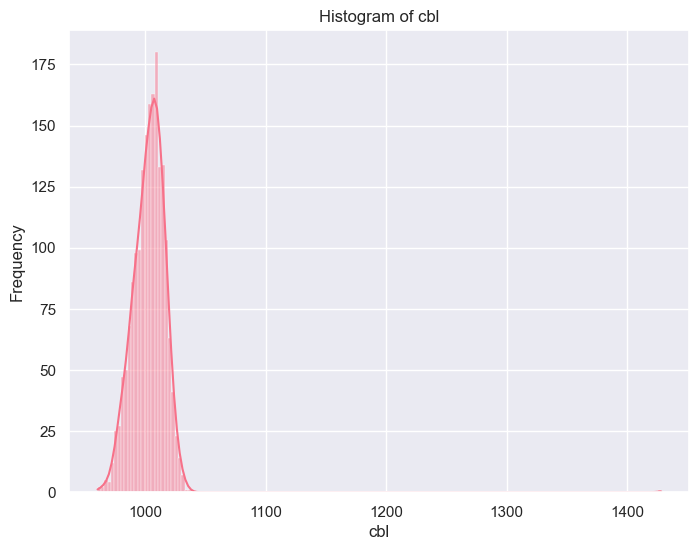

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
palette = sns.color_palette("husl", 9)

plt.figure(figsize=(8, 6))
sns.histplot(data=county_cavan, x="cbl", kde=True, color=palette[0])
plt.xlabel("cbl")
plt.ylabel("Frequency")
plt.title("Histogram of cbl")
plt.show()



In [12]:
print(county_cavan.dtypes)

date              datetime64[ns]
maxtp                     object
mintp                     object
igmin                     object
gmin                     float64
rain                     float64
cbl                      float64
wdsp                     float64
hm                         int64
ddhm                       int64
hg                         int64
soil                     float64
pe                       float64
evap                     float64
smd_wd                   float64
smd_md                   float64
smd_pd                   float64
glorad                     int64
rainfall_class              bool
dtype: object


In [9]:
county_cavan['rainfall_class'] = county_cavan['rain'] != 0

In [3]:
columns_to_convert = ["maxtp","mintp"]
county_cavan[columns_to_convert] = county_cavan[columns_to_convert].astype(float)

In [5]:
with open("data/county_cavan.pkl", "wb") as f:
        pickle.dump(county_cavan, f)

Starting point from loading Pkl file

In [6]:
import pandas as pd
import pickle

with open("data/county_cavan.pkl", "rb") as f:
    county_cavan = pickle.load(f)


In [4]:
county_cavan.dtypes

date              datetime64[ns]
maxtp                    float64
mintp                    float64
igmin                     object
gmin                     float64
rain                     float64
cbl                      float64
wdsp                     float64
hm                         int64
ddhm                       int64
hg                         int64
soil                     float64
pe                       float64
evap                     float64
smd_wd                   float64
smd_md                   float64
smd_pd                   float64
glorad                     int64
rainfall_class              bool
dtype: object

In [7]:
county_cavan.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
maxtp,1826.0,13.323658,5.226540,-3.100,9.4000,13.0000,17.2000,30.800000
mintp,1826.0,6.131051,4.601032,-7.400,2.6000,6.1000,9.8000,18.000000
gmin,1826.0,4.246769,5.597458,-12.600,0.1000,4.3000,8.6000,16.900000
rain,1826.0,2.845016,4.802122,0.000,0.0000,0.7000,3.7000,48.800000
cbl,1826.0,1003.147606,15.861901,960.400,994.6000,1004.2000,1011.7000,1428.128916
wdsp,1826.0,6.103450,2.771703,1.100,3.9000,5.6000,7.8000,17.500000
hm,1826.0,11.744797,4.373336,3.000,9.0000,11.0000,14.0000,37.000000
ddhm,1826.0,193.986857,81.223438,0.000,140.0000,210.0000,240.0000,350.000000
hg,1826.0,20.549288,7.742077,4.000,15.0000,19.0000,25.0000,63.000000
soil,1826.0,10.872302,5.160410,0.097,6.4645,10.4115,15.3965,24.375000


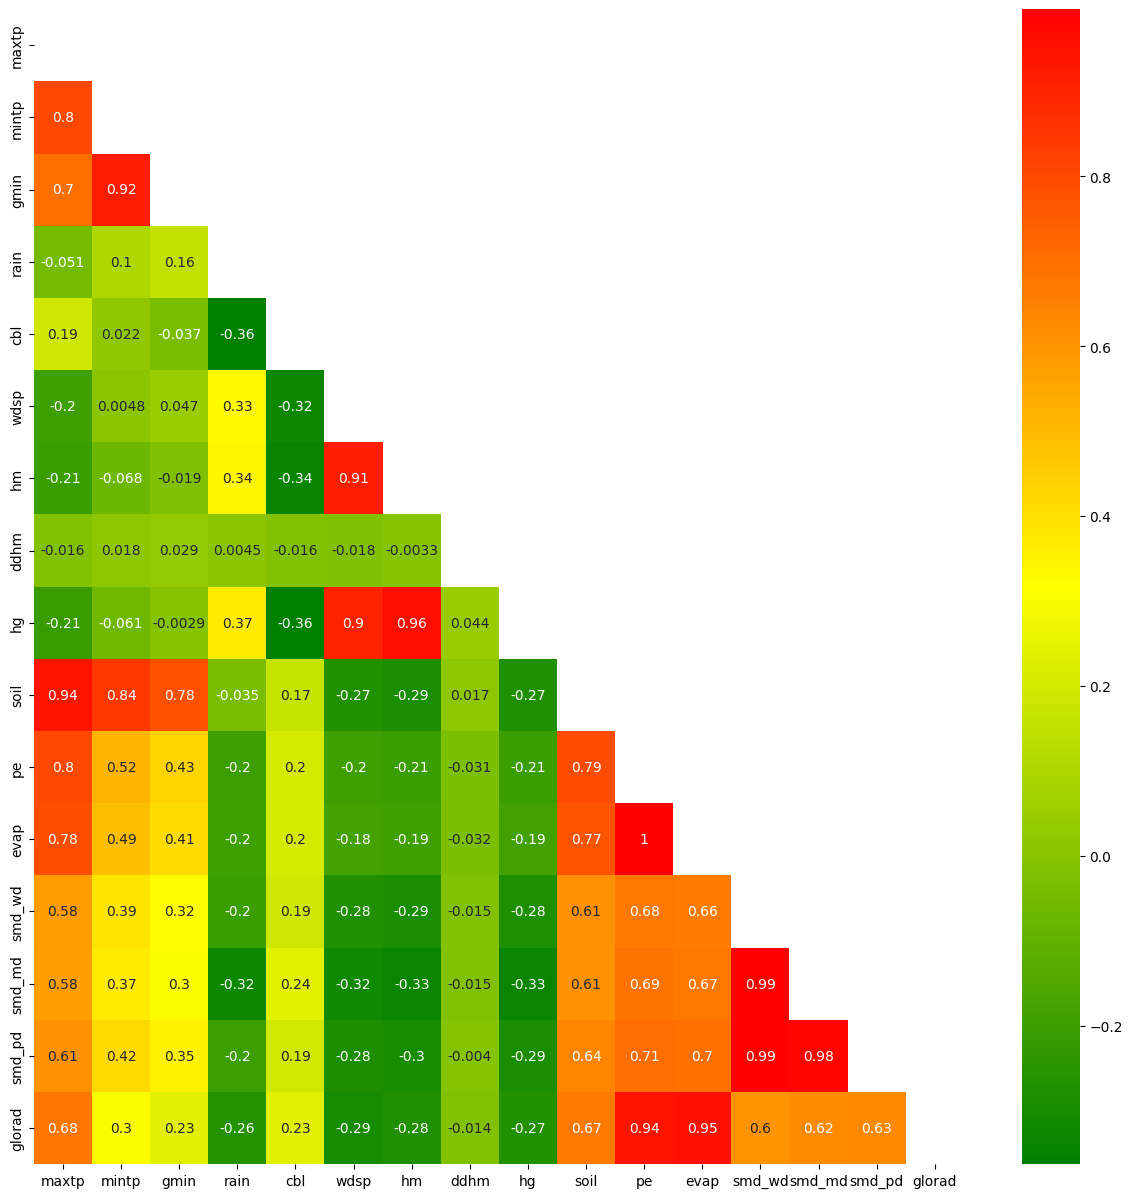

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = ['green', 'yellow', 'red']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('green_yellow_red', colors)

# Plot correlation matrix for numerical variables in shanon dataset except date,ind.5,ind.4,ind.3,ind.2,ind.1
num_cols = county_cavan.select_dtypes(include="number").filter(regex='^(?!ind)').columns  
corr = county_cavan[num_cols].corr(method="pearson")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap=cmap)
plt.savefig("cavan_heatmap_pearson.png")

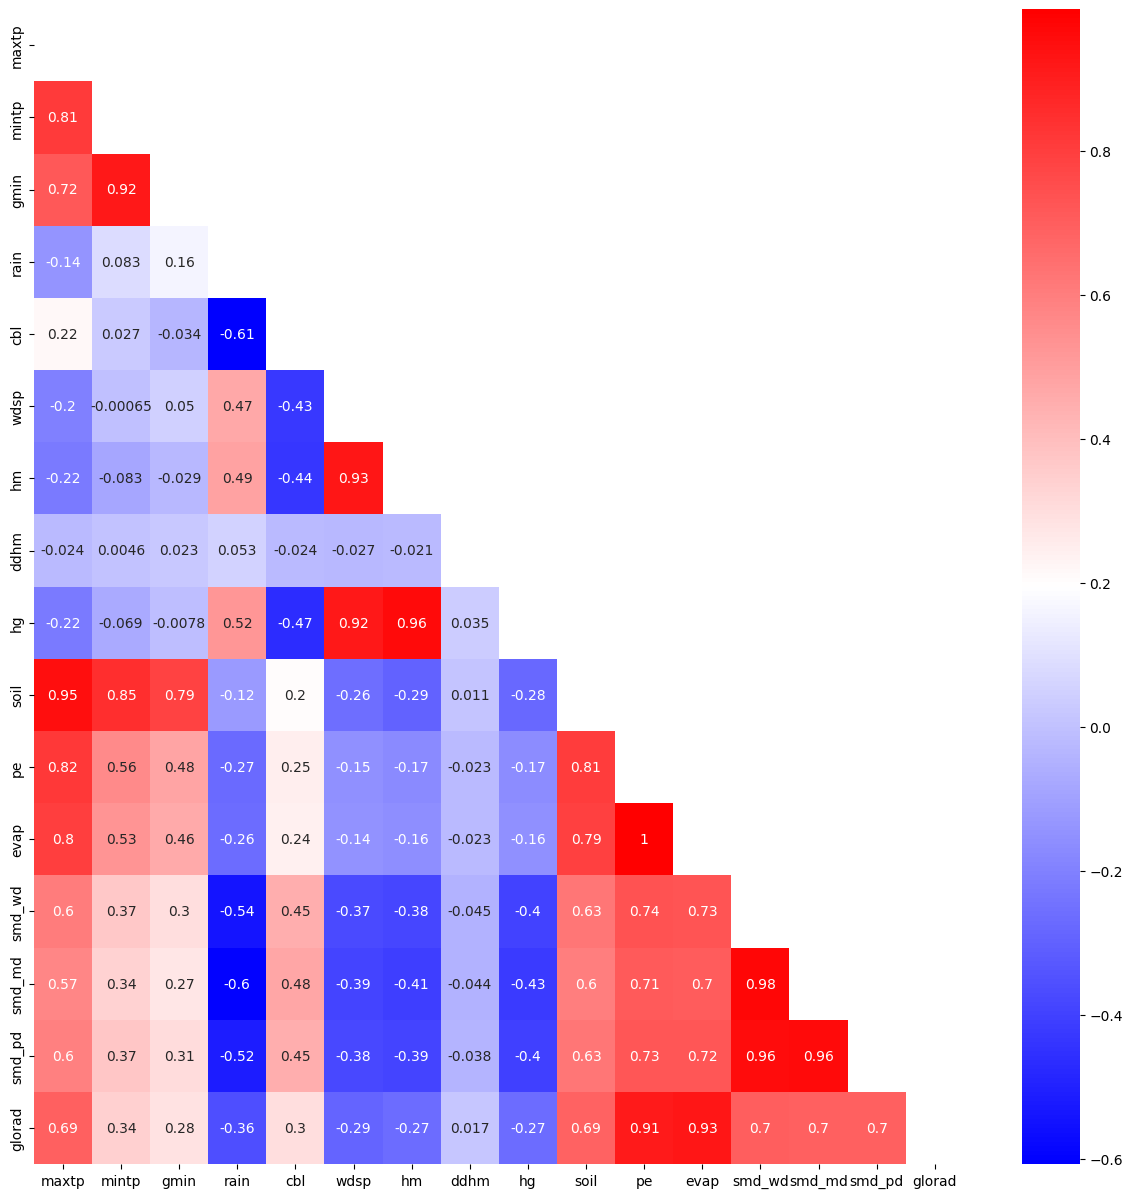

In [9]:
num_cols = county_cavan.select_dtypes(include="number").filter(regex='^(?!ind)').columns     
corr = county_cavan[num_cols].corr(method="spearman")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap="bwr")
plt.savefig("cavan_heatmap_spearman.png")

In [10]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_cavan.drop(['rainfall_class','date'], axis=1)
y = county_cavan['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("KNN Classifier", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.995,0.991,0.981,1.000,0.991
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,KNN Classifier,0.930,0.889,0.922,0.857,0.889
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Remove hm

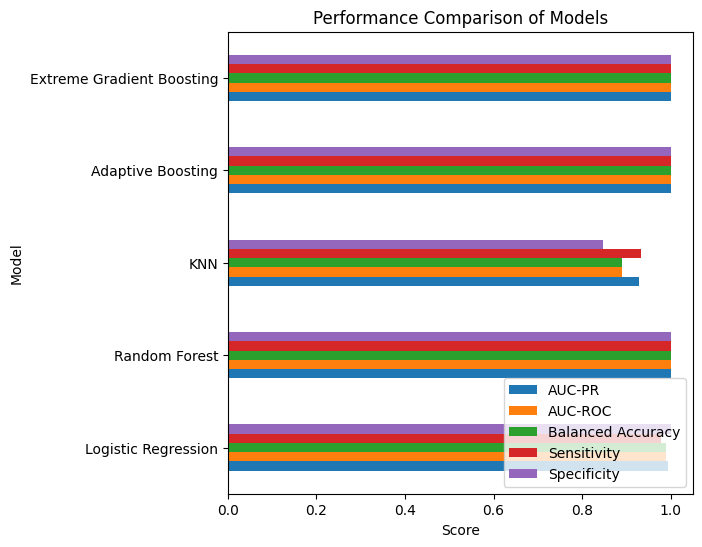

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_cavan.drop(['rainfall_class', 'date', 'hm'], axis=1)
y = county_cavan['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe
    results.loc[len(results)] = [name, auc_pr, auc_roc, balanced_accuracy,sensitivity, specificity]

# Set the model names as the index of the dataframe
results.set_index("Model", inplace=True)

# Plot the performance metrics
results.plot(kind="barh", figsize=(6, 6))
plt.xlabel("Score")
plt.ylabel("Model")
plt.title("Performance Comparison of Models")
plt.legend(loc="lower right")
plt.show()


Removing Minimum Temperature

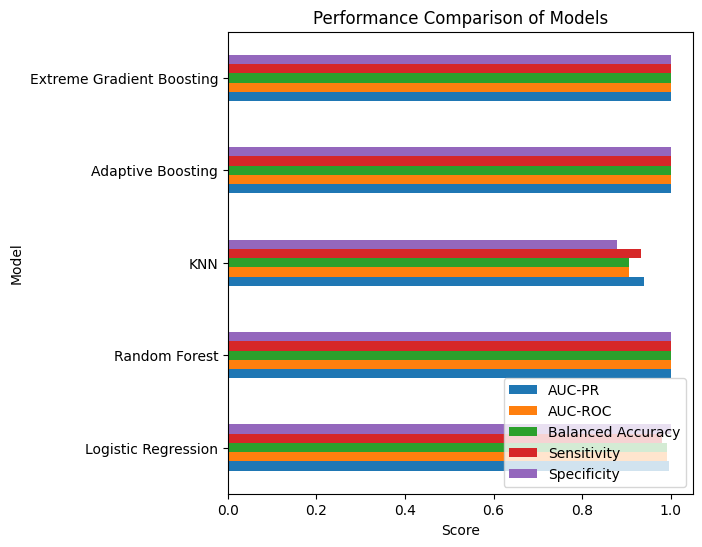

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_cavan.drop(['rainfall_class', 'date', 'mintp'], axis=1)
y = county_cavan['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe
    results.loc[len(results)] = [name, auc_pr, auc_roc, balanced_accuracy,sensitivity, specificity]

# Set the model names as the index of the dataframe
results.set_index("Model", inplace=True)

# Plot the performance metrics
results.plot(kind="barh", figsize=(6, 6))
plt.xlabel("Score")
plt.ylabel("Model")
plt.title("Performance Comparison of Models")
plt.legend(loc="lower right")
plt.show()


Removing soil

In [49]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_cavan.drop(['date','rainfall_class', 'soil'], axis=1)
y = county_cavan['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.995,0.991,0.981,1.000,0.991
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.939,0.905,0.933,0.878,0.905
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping pe

In [50]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_cavan.drop(['date','rainfall_class', 'pe'], axis=1)
y = county_cavan['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.995,0.991,0.981,1.000,0.991
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.926,0.884,0.922,0.847,0.884
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping hg

In [51]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_cavan.drop(['date','rainfall_class', 'hg'], axis=1)
y = county_cavan['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.995,0.991,0.981,1.000,0.991
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.927,0.886,0.925,0.847,0.886
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping Smd_wd

In [52]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_cavan.drop(['date','rainfall_class','smd_wd'], axis=1)
y =  county_cavan['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.995,0.991,0.981,1.000,0.991
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.929,0.888,0.918,0.857,0.888
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping Smd_md 

In [53]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score
 
X = county_cavan.drop(['date','rainfall_class','smd_md'], axis=1)
y = county_cavan['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K-nearest neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.995,0.991,0.981,1.000,0.991
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,K-nearest neighbors,0.933,0.895,0.933,0.857,0.895
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping all previously mentioned columns

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_cavan.drop(['date','rainfall_class','hg','soil','hm','pe','mintp','smd_wd','smd_md'], axis=1)
y = county_cavan['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.995,0.991,0.981,1.000,0.991
1,Random Forest,1.000,1.000,1.000,1.000,1.000
2,KNN,0.950,0.920,0.933,0.908,0.920
3,Adaptive Boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.000,1.000


In [21]:
#pip install lofo-importance

In [22]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from lofo import LOFOImportance, Dataset, plot_importance
%matplotlib inline

C:\Users\meatefza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [23]:
# extract a sample of the data
sample_cavan =county_cavan.drop(['date','rain'], axis=1)
#sample_df.sort_values("columnid", inplace=True) # Sort by time for time split validation

In [24]:
# define the validation scheme
cv4_cavan = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

In [25]:
# define the binary target and the features
datasetcavan = Dataset(df=sample_cavan, target="rainfall_class", features=[col for col in sample_cavan.columns if col != "rainfall_class"])

In [26]:
from sklearn.linear_model import LogisticRegression
# change the default model to logistic regression
log_reg = LogisticRegression()
lofo_implogcavan = LOFOImportance(datasetcavan, cv=cv4_cavan, scoring="roc_auc", model=log_reg)

In [27]:
# get the mean and standard deviation of the importances in pandas format
importance_dflogcavan = lofo_implogcavan.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

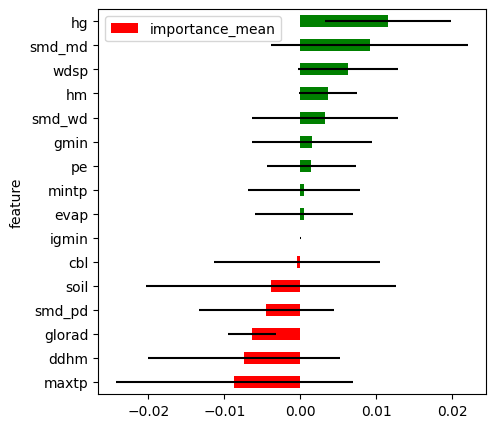

In [28]:
# plot the means and standard deviations of the importances
plot_importance(importance_dflogcavan, figsize=(5, 5))

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_cls =  RandomForestClassifier()
lofo_imprandomforestcavan = LOFOImportance(datasetcavan, cv=cv4_cavan, scoring="roc_auc", model=rf_cls)

In [30]:
importance_dfforestcavan = lofo_imprandomforestcavan.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

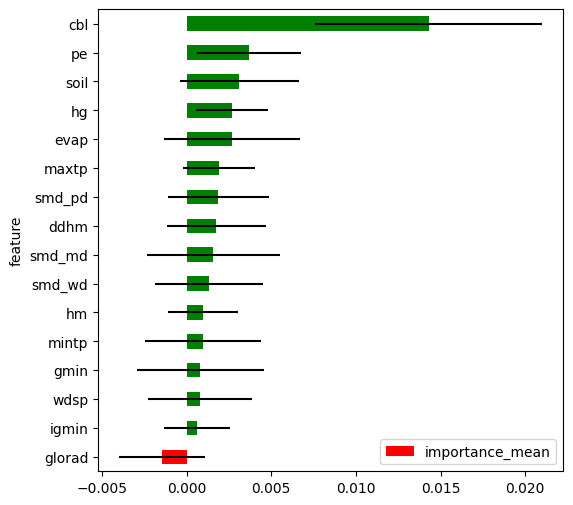

In [31]:
plot_importance(importance_dfforestcavan, figsize=(6, 6))

In [56]:
rf_knn =  KNeighborsClassifier(n_neighbors=5)
lofo_impknncavan = LOFOImportance(datasetcavan, cv=cv4_cavan, scoring="roc_auc", model=rf_knn)

In [57]:
importance_knncavan = lofo_impknncavan.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

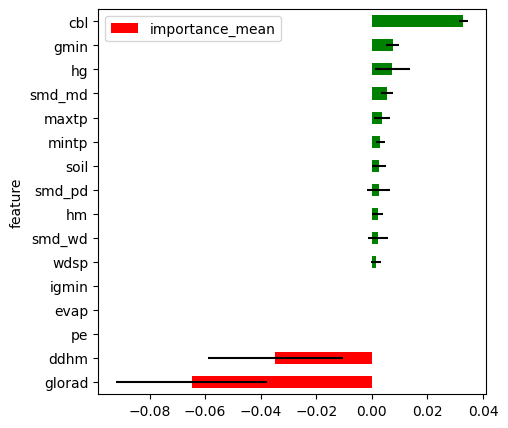

In [58]:
plot_importance(importance_knncavan, figsize=(5, 5))

In [35]:
from sklearn.ensemble import AdaBoostClassifier
rf_adaboooster =  AdaBoostClassifier()
lofo_impadaboostercavan = LOFOImportance(datasetcavan, cv=cv4_cavan, scoring="roc_auc", model=rf_adaboooster)

In [36]:
importance_adacavan = lofo_impadaboostercavan.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

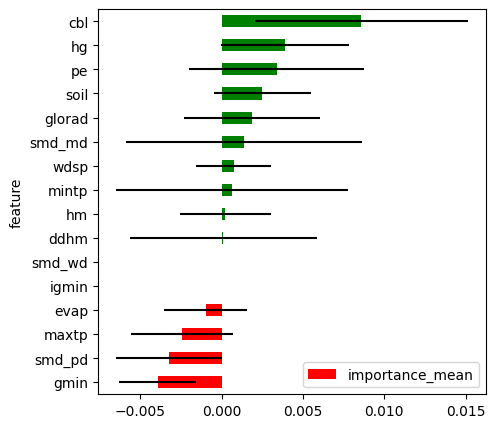

In [37]:
plot_importance(importance_adacavan, figsize=(5, 5))

In [38]:
from xgboost import XGBClassifier
rf_xgbbooster =  XGBClassifier()
lofo_impxgbboostercavan = LOFOImportance(datasetcavan, cv=cv4_cavan, scoring="roc_auc", model=rf_xgbbooster)

In [39]:
importance_xgbcavan = lofo_impxgbboostercavan.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

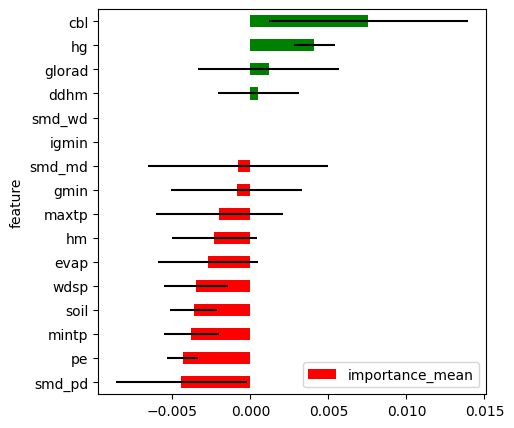

In [40]:
plot_importance(importance_xgbcavan, figsize=(5, 5))

In [41]:
import shap
shap.initjs() 

Permutation explainer: 367it [00:15,  6.20it/s]                         


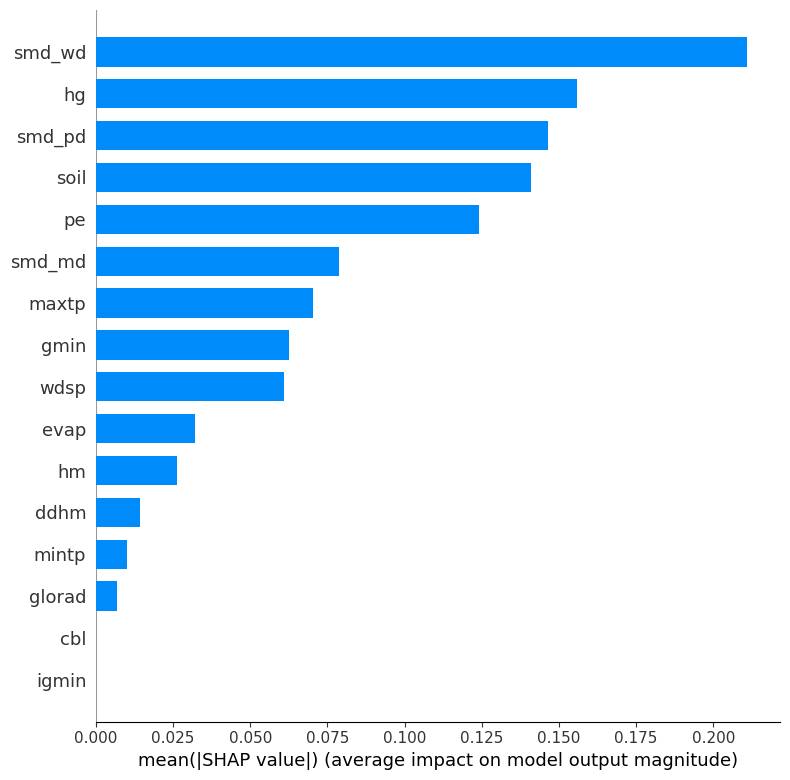

In [44]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_cavan.drop(['date','rain','rainfall_class'], axis=1)
y = county_cavan['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logregcavan = LogisticRegression().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainerlogregcavan = shap.Explainer(logregcavan.predict, X_train)
shap_valueslogregcavan = explainerlogregcavan(X_test)

shap.summary_plot(shap_valueslogregcavan, X_test, plot_type="bar")

Permutation explainer: 367it [00:38,  7.51it/s]                         


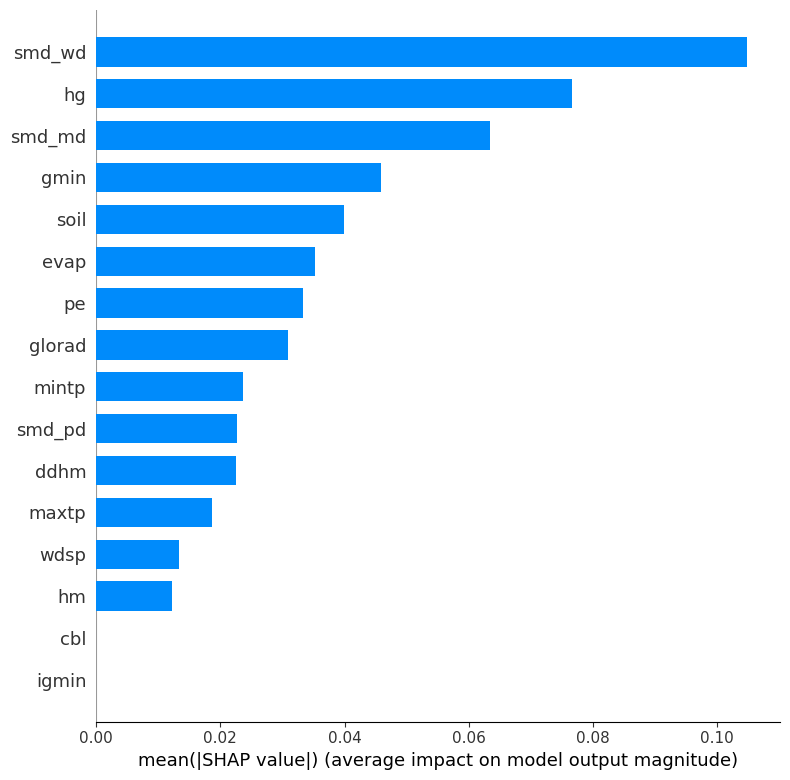

In [45]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_cavan.drop(['date','rain','rainfall_class'], axis=1)
y = county_cavan['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelxgb = XGBClassifier().fit(X_train, y_train)
# explain the model's predictions using SHAP
explainerxgb = shap.Explainer(modelxgb.predict,X_train)
shap_xgb = explainerxgb(X_test)
# visualize the first prediction's explanation
shap.summary_plot(shap_xgb, X_test, plot_type="bar")

Permutation explainer: 367it [02:43,  2.10it/s]                         


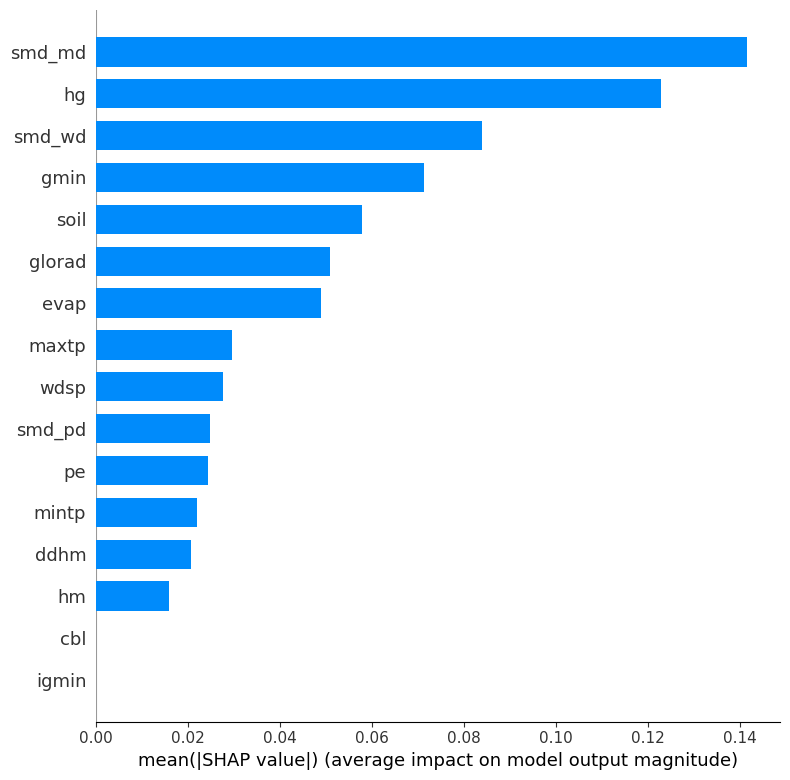

In [46]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
# Split data into features and target
X = county_cavan.drop(['date','rain','rainfall_class'], axis=1)
y = county_cavan['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


adboostcavan = AdaBoostClassifier().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_adaboostcavan = shap.Explainer(adboostcavan.predict,X_train)
shap_adaboostcavan = explainer_adaboostcavan(X_test)

shap.summary_plot(shap_adaboostcavan, X_test, plot_type="bar")

Permutation explainer: 367it [03:51,  1.51it/s]                         


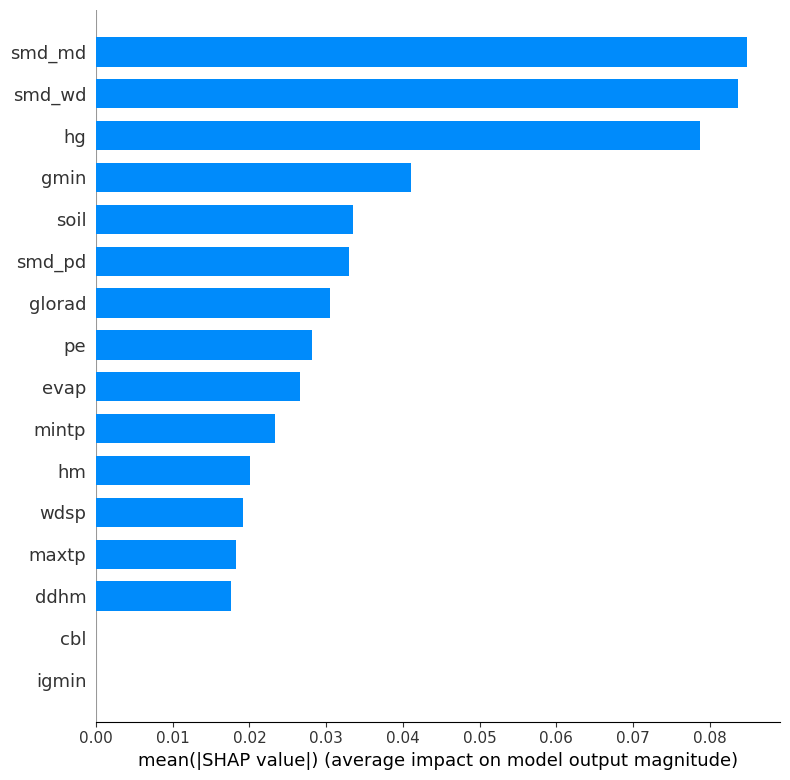

In [47]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_cavan.drop(['date','rain','rainfall_class'], axis=1)
y = county_cavan['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_cavan = RandomForestClassifier().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_rf_cavan = shap.Explainer(rf_cavan.predict, X_train)
shap_rf_cavan = explainer_rf_cavan(X_test)

# visualize the first prediction's explanation
shap.summary_plot(shap_rf_cavan, X_test, plot_type="bar")


Permutation explainer: 367it [27:27,  4.53s/it]                         


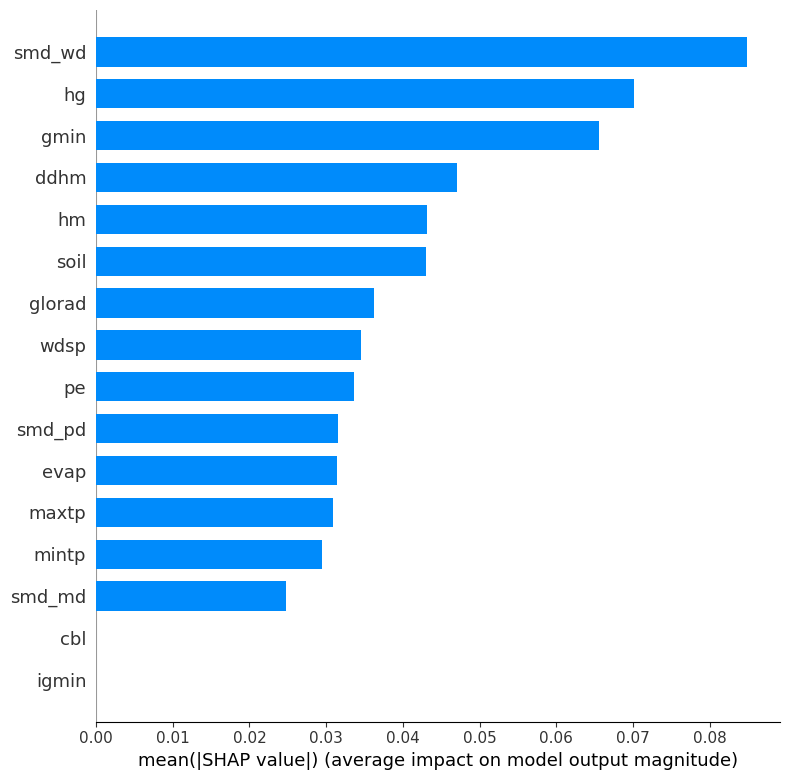

In [48]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split


# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_cavan.drop(['date','rain','rainfall_class'], axis=1)
y = county_cavan['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_cavan = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_knnclassifiercavan = shap.Explainer(knn_cavan.predict, X_train)
shap_values_knnclassifier = explainer_knnclassifiercavan(X_test)

shap.summary_plot(shap_values_knnclassifier, X_test, plot_type="bar")